# Importing Libraries

In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV,KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Loading Data

In [190]:
df=pd.read_csv('car data (1).csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Data Exploration

In [191]:
df.shape

(301, 9)

In [192]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [193]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [195]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

# Data Cleaning

In [196]:
df=df[~df.duplicated()]

In [197]:
# drop car name because it has unique values
df.drop(['Car_Name'], axis=1, inplace=True)

In [198]:
df.Year=2023-df.Year

In [199]:
df

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,9,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,10,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,6,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,12,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,9,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,7,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,8,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,14,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,6,11.50,12.50,9000,Diesel,Dealer,Manual,0


# EDA

In [200]:
df_num=df.select_dtypes(np.number)
df_cat=df.select_dtypes(object)

### Univariate Analysis

In [201]:
df_num

,Year,Selling_Price,Present_Price,Driven_kms,Owner
0,9,3.35,5.59,27000,0
1,10,4.75,9.54,43000,0
2,6,7.25,9.85,6900,0
3,12,2.85,4.15,5200,0
4,9,4.60,6.87,42450,0
...,...,...,...,...,...
296,7,9.50,11.60,33988,0
297,8,4.00,5.90,60000,0
298,14,3.35,11.00,87934,0
299,6,11.50,12.50,9000,0


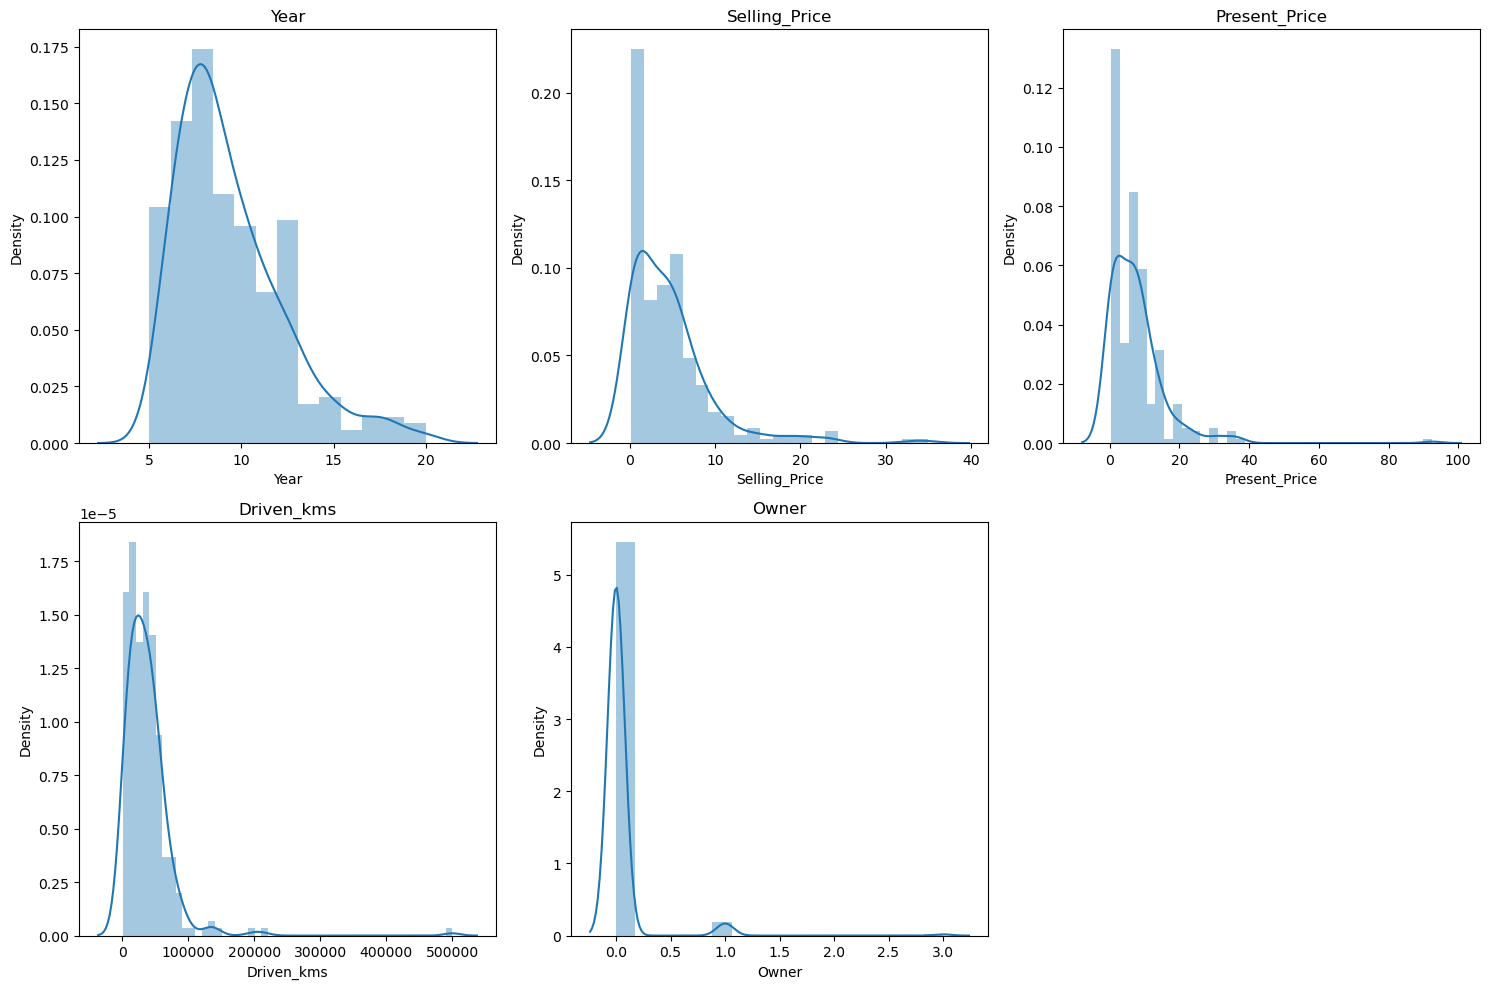

In [202]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_num.columns, 1):
    plt.subplot(2, 3, i)
    plt.title(column)
    sns.distplot(df_num[column])
plt.tight_layout()
plt.show()

- All the attributes are positively skewed.

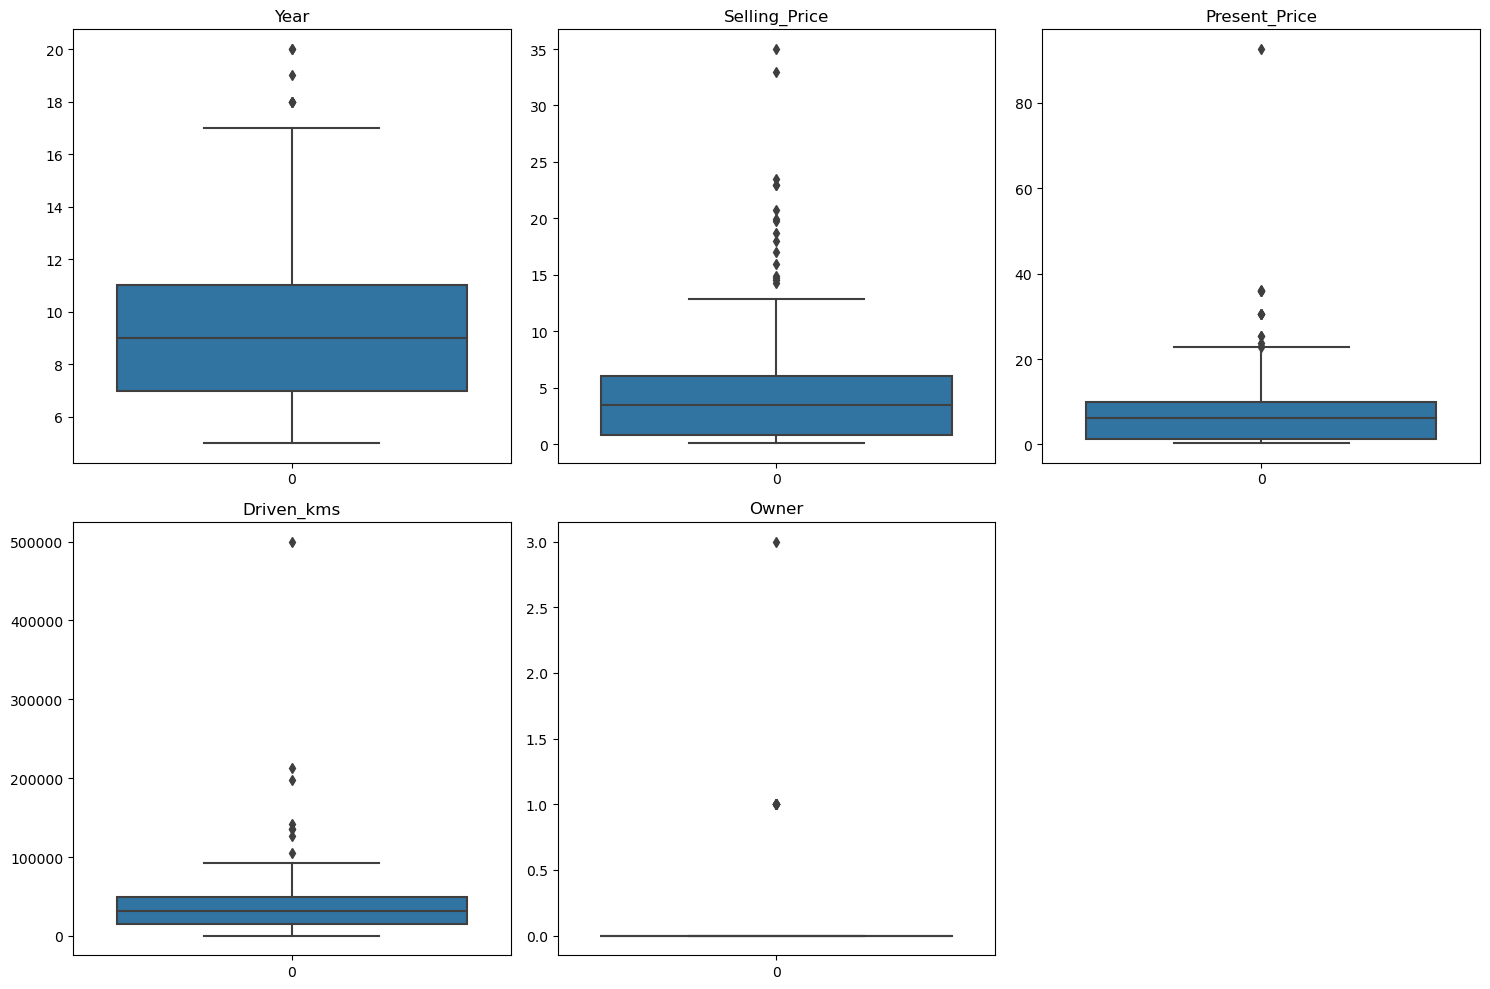

In [203]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(df_num.columns, 1):
    plt.subplot(2, 3, i)
    plt.title(column)
    sns.boxplot(df_num[column])

plt.tight_layout()
plt.show()

- There is presence of outliers in all attributes.

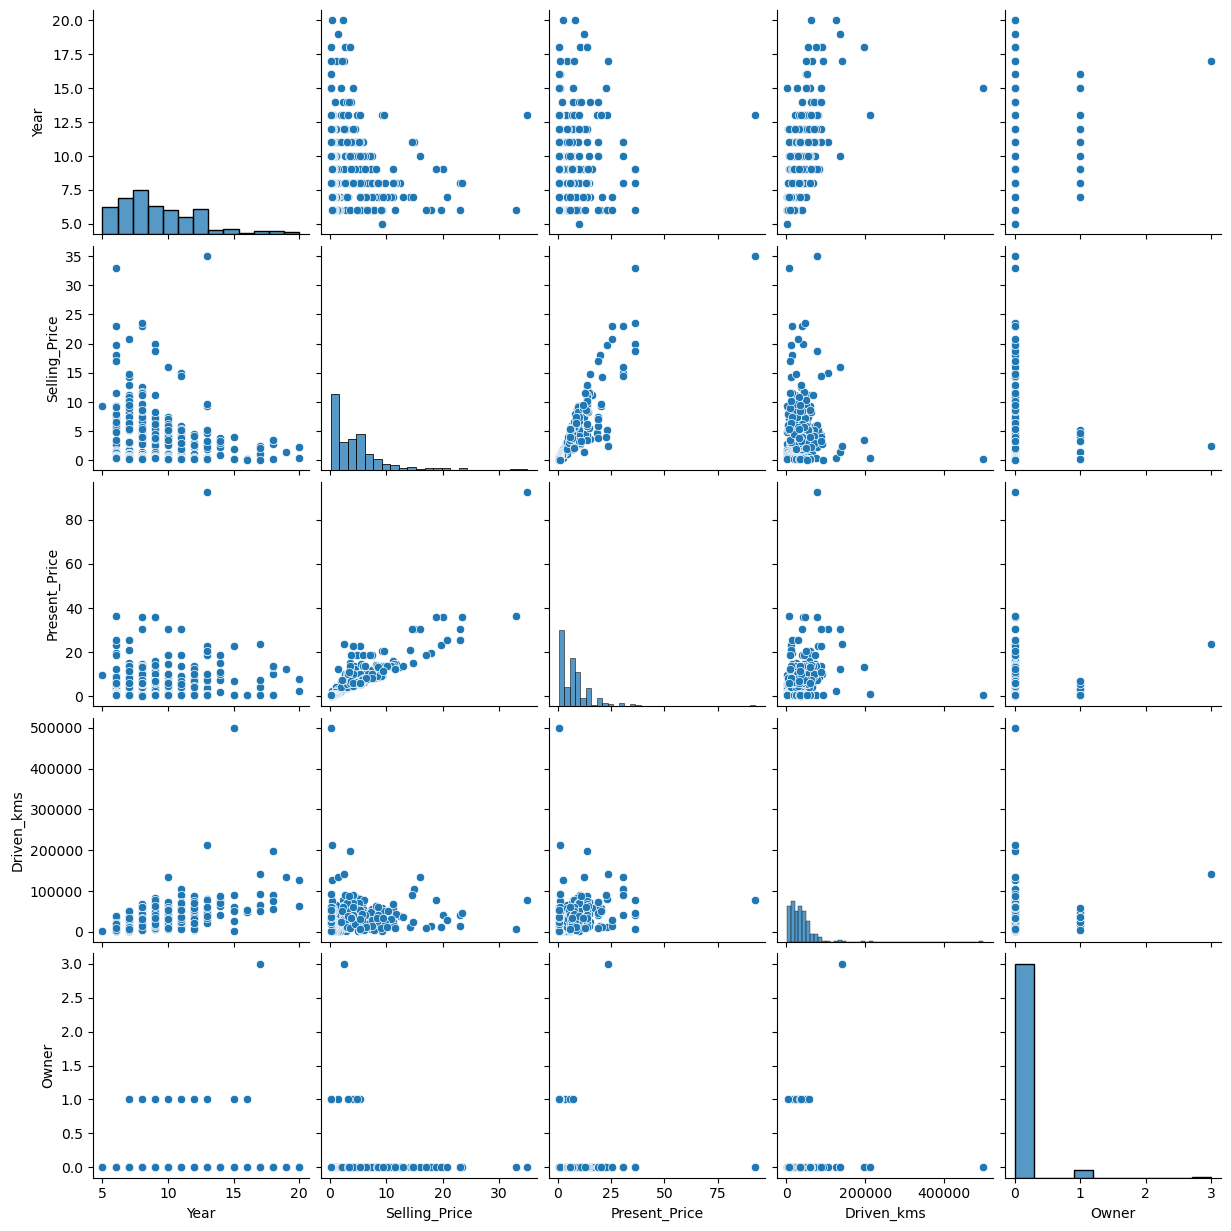

In [204]:
sns.pairplot(df)

### Bivariate Analysis

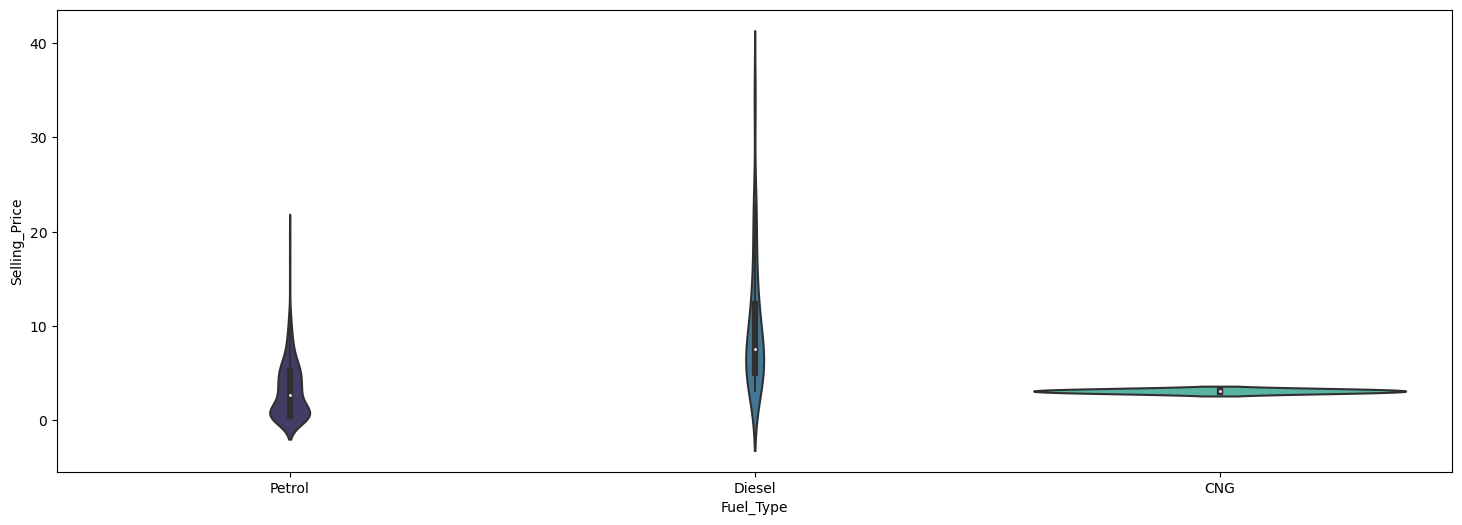

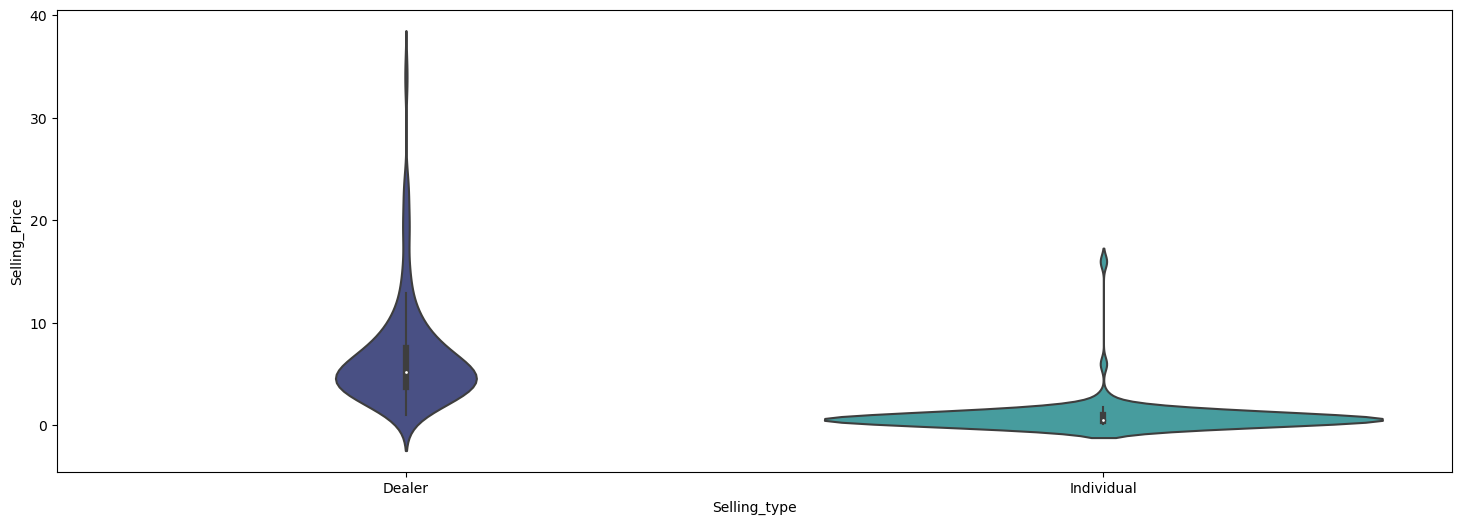

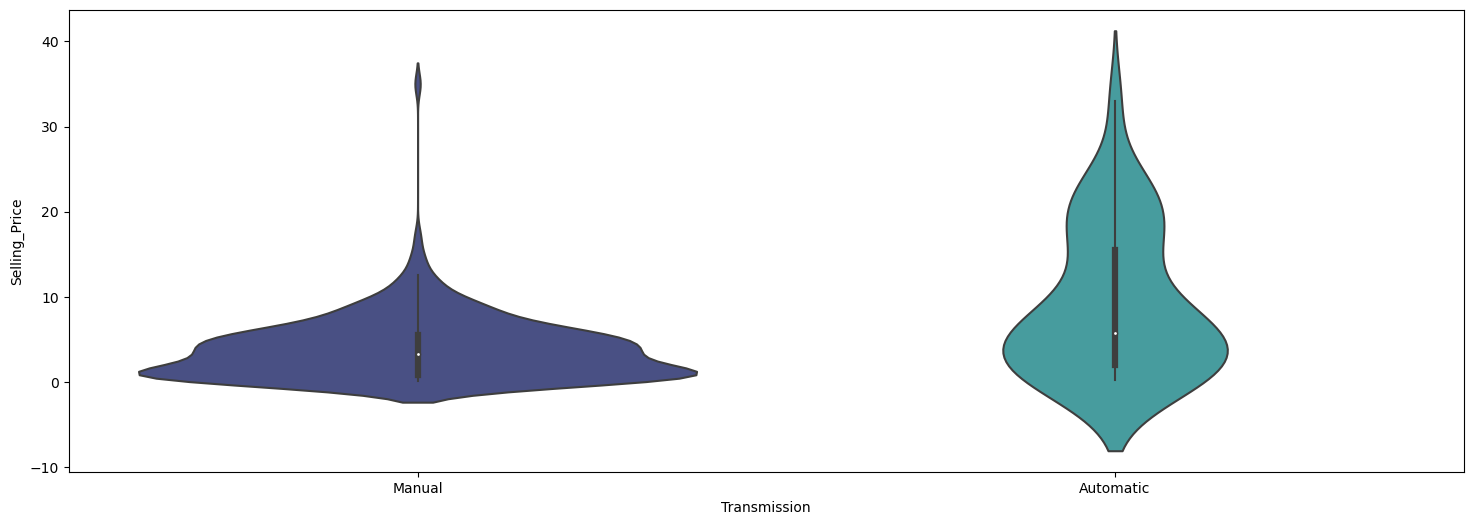

In [205]:
for i in df_cat:
    plt.figure(figsize=(18,6))
    sns.violinplot(y='Selling_Price',data=df, palette="mako", x=df[i])
    plt.show()

- The distribution of selling price for fuel type petrol and diesel are positively skewed and for CNG it is not showing much distribution.
- The median for diesel is more than others. For diesel there are more outliers.
- The distribution of selling price for the dealer type of individual is highly positively skewed with extreme outliers and for dealerer type, it is highly postively skewed and with more outliers.
- The distribution of of selling price for the transmission as manual is highly positively skewed with outliers and automatic has a broadly disrtibuted right skew.


# Multivariate Analysis

<Axes: >

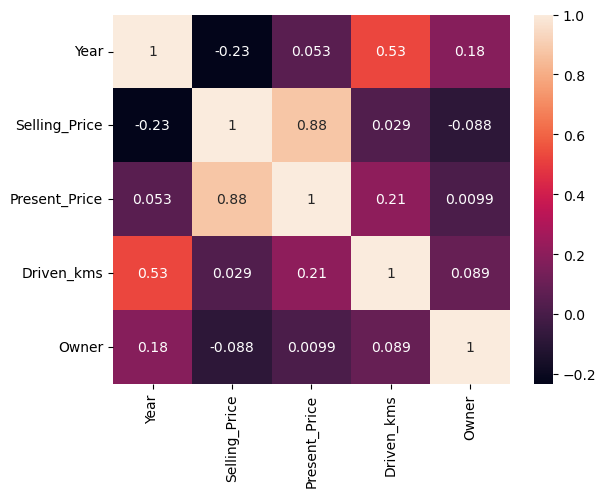

In [206]:
sns.heatmap(df.corr(), annot=True)

- There is less multicollinearity in this data.

# Data Preprocessing

In [207]:
df_final=pd.get_dummies(df,drop_first=True)

In [219]:
df_final

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,9,3.35,5.59,27000,0,0,1,0,1
1,10,4.75,9.54,43000,0,1,0,0,1
2,6,7.25,9.85,6900,0,0,1,0,1
3,12,2.85,4.15,5200,0,0,1,0,1
4,9,4.60,6.87,42450,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,7,9.50,11.60,33988,0,1,0,0,1
297,8,4.00,5.90,60000,0,0,1,0,1
298,14,3.35,11.00,87934,0,0,1,0,1
299,6,11.50,12.50,9000,0,1,0,0,1


# Building Model

In [220]:
X=df_final.drop(['Selling_Price'],axis=1)
y=df_final.Selling_Price

In [221]:
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=0, test_size=0.3)

In [224]:
kf=KFold(n_splits=5,
         shuffle=True,
         random_state=0)

In [225]:
rf=RandomForestRegressor()
rf_params={"max_depth":np.arange(1,20),
          "min_samples_leaf":np.arange(2,15),
          "n_estimators":np.arange(2,10)}
gs_rf=GridSearchCV(rf,
                   rf_params,
                   cv=kf,
                   scoring="neg_root_mean_squared_error")

In [226]:
gs_rf.fit(X,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'n_estimators': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='neg_root_mean_squared_error')

In [227]:
gs_rf.best_params_

{'max_depth': 19, 'min_samples_leaf': 3, 'n_estimators': 6}

In [228]:
rf=RandomForestRegressor(n_estimators=3,max_depth=3,min_samples_leaf=4)
model_rf=rf.fit(X_train,y_train)

In [229]:
pred_train_rf=model_rf.predict(X_train)
pred_test_rf=model_rf.predict(X_test)

r2_train_rf=r2_score(y_train,pred_train)
r2_test_rf=r2_score(y_test,pred_test)

r2_train,r2_test

(0.8976480273920894, 0.8161831205383964)

# Conclusion

A Random Forest Regressor model is built on the car price prediction dataset. The accuracy obtained is 81% for this model.